<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/PSant%C3%A9_01_notebooknettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2


Importation des librairies nécessaires au projet

In [3]:
import pandas as pad 
import numpy as np

In [4]:
df = pad.read_csv('data_projet2.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exploration rapide des données

In [5]:
df.shape

(320772, 162)

In [6]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[:20]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,Unfi,unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
df.describe()
#df.shape

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,...,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,...,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.076167,10.832591,5.607988,7.971418,13.927752,1.978192,17.512632,6.494183,0.025534,0.029160,0.010597,25.175674,26.010496,NaN,4.972452e-07,...,0.694039,1.031398,2.236451,2.474306,1.277026,0.339262,1.206822,0.335163,5.132250,5.514738e-03,0.737912,1.475120,0.040660,0.189486,12.528768,0.149725,3.318263,12.058090,0.214408,13.498653,0.080953,0.914247,0.028036,0.067952,0.104503,0.006697,0.001118,0.001285,6.475588,0.172312,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064000,5.200000,NaN,NaN,61.0,NaN,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095000,0.043307,1.000000,1.080000,NaN,1.000000e-06,...,0.000000,0.000000,-0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Evaluation des variables utilisables ou non pour la problématique

In [9]:
print("Shape de la variable empreinte carbone : " + str(df['carbon-footprint_100g'].shape))
df['carbon-footprint_100g'].describe()
print("Nombre de NaN de la variable empreinte carbone : " + str(df['carbon-footprint_100g'].isna().sum()))
print("Nombre de NaN de la variable pays d'origine : " + str(df['countries_fr'].isna().sum()))

Shape de la variable empreinte carbone : (320772,)
Nombre de NaN de la variable empreinte carbone : 320504
Nombre de NaN de la variable pays d'origine : 280


Décompte des variables présentant un nombre de données manquantes trop important (suppression de ces variables si NaN > 50 %)


In [10]:
print(df.shape)
for elm in df:
  #sum_NaN = elm.isna().sum()
  sum_count = df[elm].count()
  if sum_count < 160386:
    print(df[elm].name)
    del df[elm]

print(df.shape)

(320772, 162)
generic_name
quantity
packaging
packaging_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
allergens
allergens_fr
traces
traces_tags
traces_fr
no_nutriments
additives_tags
additives_fr
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
pnns_groups_1
pnns_groups_2
main_category
main_category_fr
image_url
image_small_url
energy-from-fat_100g
butyric-acid_100g
caproic-acid_100g
caprylic-acid_100g
capric-acid_100g
lauric-acid_100g
myristic-acid_100g
palmitic-acid_100g
stearic-acid_100g
arachidic-acid_100g
behenic-acid_100g
lignoceric-acid_100g
cerotic-acid_100g
montanic-acid_100g
melissic-acid_100g
monounsaturated-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
alpha-linolenic-acid_100g

In [11]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


Vérifier le format des données de chaque variable d'intérêt (notamment que les données quantitatives soient bien en float ou int)

In [12]:
for elm in df:
  print("la variable " + str(df[elm].name) + " est de type : " + str(df[elm].dtypes))

la variable code est de type : object
la variable url est de type : object
la variable creator est de type : object
la variable created_t est de type : object
la variable created_datetime est de type : object
la variable last_modified_t est de type : object
la variable last_modified_datetime est de type : object
la variable product_name est de type : object
la variable brands est de type : object
la variable brands_tags est de type : object
la variable countries est de type : object
la variable countries_tags est de type : object
la variable countries_fr est de type : object
la variable ingredients_text est de type : object
la variable serving_size est de type : object
la variable additives_n est de type : float64
la variable additives est de type : object
la variable ingredients_from_palm_oil_n est de type : float64
la variable ingredients_that_may_be_from_palm_oil_n est de type : float64
la variable nutrition_grade_fr est de type : object
la variable states est de type : object
la va

Dans les variables d'intérêt quantitatives, vérifier qu'il n'existe pas de valeurs manquantes qui ne serait pas rentrées en tant que "NaN" mais sous une autre forme non prise en charge par pandas comme 'n/a' ou '--'

In [13]:
list_of_quantitative_variables_to_analyse = ["additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]  
for i in range(len(list_of_quantitative_variables_to_analyse)):
  for values in df[list_of_quantitative_variables_to_analyse[i]]:
    if "n/a" in str(values) or "--" in str(values):
      print("la variable " + str(list_of_quantitative_variables_to_analyse[i]) + " présente des valeurs manquantes non vues par pandas comme étant des NaN")

Dans les variables d'intérêt qualitatives, vérifier qu'il n'existe pas de valeurs numériques, dans ce cas les remplacer par des NaN

In [14]:
for values in df['countries_fr']:
    index = 0
    try:
        int(values)
        df.loc[index, 'countries_fr']=np.nan
        print("une valeur a été modifiée dans la variable countries_fr")
    except ValueError:
        pass
    index+=1

for values in df['nutrition_grade_fr']:
    index = 0
    try:
        int(values)
        df.loc[index, 'nutrition_grade_fr']=np.nan
        print("une valeur a été modifiée dans la variable nutrition_grade_fr")
    except ValueError:
        pass
    index+=1

for values in df['product_name']:
    index = 0
    try:
        int(values)
        df.loc[index, 'product_name']=np.nan
        print("une valeur a été modifiée dans la variable product_name")
    except ValueError:
        pass
    index+=1

une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name
une valeur a été modifiée dans la variable product_name


Repérer les valeurs abérantes des variables quantitatives

In [15]:
list_of_quantitative_variables_to_analyse = ["ingredients_from_palm_oil_n",  "ingredients_that_may_be_from_palm_oil_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]  
for i in range(len(list_of_quantitative_variables_to_analyse)):
  print(str(df[list_of_quantitative_variables_to_analyse[i]].name) + " mean = " + str(df[list_of_quantitative_variables_to_analyse[i]].mean()))
  print(str(df[list_of_quantitative_variables_to_analyse[i]].name) + " min = " + str(df[list_of_quantitative_variables_to_analyse[i]].min()))
  print(str(df[list_of_quantitative_variables_to_analyse[i]].name) + " max = " + str(df[list_of_quantitative_variables_to_analyse[i]].max()))

ingredients_from_palm_oil_n mean = 0.01965943464061477
ingredients_from_palm_oil_n min = 0.0
ingredients_from_palm_oil_n max = 2.0
ingredients_that_may_be_from_palm_oil_n mean = 0.055246466001711264
ingredients_that_may_be_from_palm_oil_n min = 0.0
ingredients_that_may_be_from_palm_oil_n max = 6.0
energy_100g mean = 1141.9146047649865
energy_100g min = 0.0
energy_100g max = 3251373.0
fat_100g mean = 12.730378571711286
fat_100g min = 0.0
fat_100g max = 714.29
saturated-fat_100g mean = 5.129932302769744
saturated-fat_100g min = 0.0
saturated-fat_100g max = 550.0
carbohydrates_100g mean = 32.07398107500914
carbohydrates_100g min = 0.0
carbohydrates_100g max = 2916.67
sugars_100g mean = 16.00348354735897
sugars_100g min = -17.86
sugars_100g max = 3520.0
fiber_100g mean = 2.862110947303177
fiber_100g min = -6.7
fiber_100g max = 5380.0
proteins_100g mean = 7.07593965920594
proteins_100g min = -800.0
proteins_100g max = 430.0
salt_100g mean = 2.0286239493369744
salt_100g min = 0.0
salt_100g m

Les variables "*sugars_100g*", "*proteins_100g*" et "*nutrition-score-fr_100g*" présentent des valeurs négatives. C'est normal pour le nutriscore mais pas pour le sucre et les protéines. Il faut mettre ces valeurs à zéro

In [16]:
df[df['sugars_100g'] < 0] = 0
df[df['proteins_100g'] < 0] = 0

Regarder si les valeurs abbérantes sont des valeurs dupliquées

In [17]:
for elm in df:
  print(df[df[elm].duplicated() == True])

               code  ... nutrition-score-uk_100g
481           16117  ...                     NaN
519           24600  ...                     NaN
560           31233  ...                     NaN
632           58001  ...                    12.0
1337     9800800056  ...                    21.0
...             ...  ...                     ...
280571     54491472  ...                     2.0
280572     54491496  ...                     NaN
281938  58449410003  ...                     NaN
300376  78742087108  ...                     NaN
301337     80007838  ...                     NaN

[142 rows x 34 columns]
       code  url  ... nutrition-score-fr_100g nutrition-score-uk_100g
18209     0    0  ...                     0.0                     0.0
33781     0    0  ...                     0.0                     0.0
115310    0    0  ...                     0.0                     0.0
117739    0    0  ...                     0.0                     0.0
146284    0    0  ...                

Les dernières lignes semblent être des valeurs abbérantes et dupliquées

Nettoyage des valeurs aberrantes en supprimant les données significativement (p<0.05) différentes de la valeur moyenne

In [29]:
list_of_quantitative_variables_to_analyse = ["additives_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "nutrition-score-fr_100g"]
df_Quant = df[list_of_quantitative_variables_to_analyse]
df_Quant = df_Quant[np.abs(df_Quant-df_Quant.mean()) <= (1.96*df_Quant.std())]
df_Quant = df_Quant[np.abs(df_Quant-df_Quant.mean()) <= (1.96*df_Quant.std())]
df_Quant_abberrante = df_Quant[np.abs(df_Quant-df_Quant.mean()) >= (1.96*df_Quant.std())]

In [30]:
df[list_of_quantitative_variables_to_analyse] = df_Quant

Vérification et évaluation de l'impact de la sélection des valeurs non-aberrantes

In [37]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,200968.000000,248939.000000,248939.000000,251041.000000,204029.000000,189178.000000,231003.000000,195884.000000,173412.000000,216945.000000,241807.000000,255463.000000,217376.000000,221213.000000
mean,0.948345,0.019659,0.055246,1050.041054,6.579770,2.246631,28.863634,6.763128,1.498243,4.150505,0.751044,0.798750,8.941378,9.057777
std,1.058022,0.140524,0.269207,713.566735,8.062444,2.871308,26.381360,7.948817,1.678807,3.907033,0.827784,50.504425,8.771823,9.183578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-15.000000
25%,0.000000,0.000000,0.000000,360.000000,0.000000,0.000000,5.360000,0.700000,0.000000,0.100000,0.050000,0.025000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1046.000000,2.600000,0.800000,18.000000,3.570000,1.000000,3.330000,0.497840,0.229000,9.000000,9.000000
75%,2.000000,0.000000,0.000000,1628.000000,11.560000,3.570000,53.570000,10.300000,2.600000,7.100000,1.200000,0.541000,16.000000,16.000000
max,3.000000,2.000000,6.000000,2507.000000,27.800000,10.600000,82.000000,30.750000,6.490000,13.680000,3.810000,25320.000000,26.000000,40.000000


Identification et quantification des valeurs aberrantes pour chaque variables

In [21]:
df_Quant_abberrante.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,18225.000000,6270.000000,13153.000000,15657.000000,4500.000000,18143.000000,11474.000000,16683.000000,3804.000000,0.0
mean,5.400000,3289.792536,39.410264,17.459208,87.498013,50.352549,13.420473,20.073644,46.178029,NaN
std,0.489911,539.294137,4.108032,1.705088,1.714976,4.728455,4.087250,1.618207,29.783716,NaN
min,5.000000,2701.000000,33.770000,14.420000,84.900000,42.570000,-6.700000,17.300000,14.848840,NaN
25%,5.000000,2987.000000,35.710000,16.000000,85.710000,46.430000,10.700000,18.580000,20.982940,NaN
50%,5.000000,3347.000000,38.800000,17.650000,87.500000,50.000000,11.900000,20.000000,34.544000,NaN
75%,6.000000,3586.000000,42.860000,19.000000,88.890000,54.170000,14.700000,21.430000,66.697860,NaN
max,6.000000,13213.000000,47.170000,20.830000,90.320000,59.740000,28.000000,23.100000,234.950000,NaN


In [22]:
df.shape

(320772, 34)

Suppression des variables sans intérêt pour la problématique de l'application 

NB_1 : les variables sur l'huile de palme sont à 0 après suppression des valeurs abberrantes, il n'y a plus lieu de les garder.

NB_2 : le nutriscore UK est quasiment identique à celui du nutriscore FR, il n'y a pas d'intérêt à le garder

Dernière vérification des données : le salt (de formule Na+Cl-) est certainement similaire au sodium (de formule Na+), il y a t-il une utilité à le garder ?

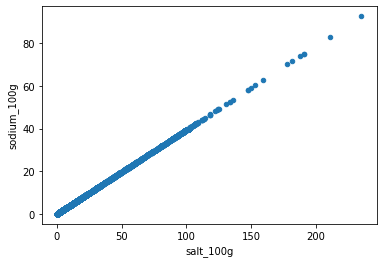

In [23]:
df.plot.scatter(x='salt_100g',y='sodium_100g')

Réponse : non, suppresion de la variable sodium

Formattage de la database finale après nettoyage

In [32]:
list_of_quantitative_variables_to_analyse = ["additives_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "nutrition-score-fr_100g"]
list_of_qualitative_variables_to_analyse = ["code", "countries_fr", "nutrition_grade_fr", "product_name"]
list_of_variable_of_interest = list_of_qualitative_variables_to_analyse + list_of_quantitative_variables_to_analyse
df_clean = df[list_of_variable_of_interest]

Renommer les variables pour plus de lisibilité

In [33]:
simpliest_name = {"code": "code_bar", "countries_fr": "countries", "nutrition_grade_fr": "nutrition_grade",  "product_name": "product_name", "additives_n":"additives",  "energy_100g":"energy", "fat_100g": "fat", "saturated-fat_100g":"saturated-fat", "carbohydrates_100g": "carbohydrates", "sugars_100g":"sugars", "fiber_100g":"fiber", "proteins_100g":"proteins", "salt_100g":"salt", "nutrition-score-fr_100g":"nutrition-score"}
df_clean.rename(columns=simpliest_name, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Reset des index maintenant que la database est nettoyée

In [34]:
df_clean.reset_index(inplace=True, drop=True)

In [35]:
df_clean.head()

,code_bar,countries,nutrition_grade,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutrition-score
0,3087,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,d,Banana Chips Sweetened (Whole),0.0,2243.0,NaN,NaN,64.29,14.29,3.6,3.57,0.00000,14.0
2,4559,États-Unis,b,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,NaN,NaN,0.63500,0.0
3,16087,États-Unis,d,Organic Salted Nut Mix,0.0,NaN,NaN,5.36,17.86,3.57,NaN,NaN,1.22428,12.0
4,16094,États-Unis,NaN,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN


Sauvegarde de la database nettoyée

In [36]:
df_clean.to_csv('data_projet2_clean.csv', sep='\t', index=False)